> Họ và tên: Phùng Dũng Quân\
> MSSV: 22280073

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('bang_cho_vay.csv')
df

,Luong,Thoi gian lam viec,Cho vay
0,10,1.00,1
1,5,2.00,1
2,6,1.80,1
3,7,1.00,1
4,8,2.00,1
5,4,3.00,1
6,5,2.50,1
7,8,1.00,1
8,4,2.50,1
9,8,0.10,0


In [20]:
# Chuẩn bị dữ liệu
X = df[['Luong', 'Thoi gian lam viec']].values
y = df['Cho vay'].values
X = np.c_[np.ones(X.shape[0]), X]
initial_weight = np.zeros(X.shape[1])
X_new = np.array([[1, 9, 0.5]])

In [21]:
# Hàm tính vector gradient
def nabla_L(weights, X, y):
    y_pred = sigmoid(weights, X)
    return X.T @ (y_pred - y)

# Hàm tính trọng số
def gradient_descent(X, y, initial_weight, eta, max_iterations, epsilon):
    current_weight = initial_weight.copy()
    i = 0
    while i <= max_iterations:
        next_weight = current_weight - eta * nabla_L(current_weight, X, y)
        if np.linalg.norm(nabla_L(current_weight, X, y)) < epsilon:
            return next_weight, i
        current_weight = next_weight
        i += 1
    return next_weight, i

# Hàm dự đoán xác suất
def sigmoid(weights, X):
    return 1 / (1 + np.exp(-X @ weights))  

In [22]:
weights, so_vong_lap = gradient_descent(X, y, initial_weight, 2e-2, 40000, 1e-2)
probability = sigmoid(weights, X_new)
print("Hệ số dự đoán là:", weights)
print("Thuật toán hội tụ sau", so_vong_lap, "bước lặp")
if probability >= 0.8:
    print("Hồ sơ được cho vay")
    print("Xác suất cho vay là:", probability)
else:
    print("Hồ sơ không được cho vay")
    print("Xác suất cho vay là:", probability) 

Hệ số dự đoán là: [-29.01636784   2.74092011  13.32163658]
Thuật toán hội tụ sau 34390 bước lặp
Hồ sơ được cho vay
Xác suất cho vay là: [0.90992598]


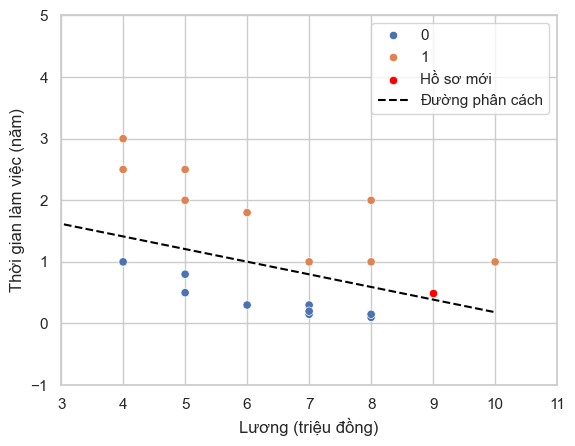

In [27]:
from matplotlib.lines import Line2D

# Chuẩn bị dữ liệu cho việc vẽ
sns.set(style="whitegrid")
plt.figure()
sns.scatterplot(x=df['Luong'], y=df['Thoi gian lam viec'], hue=df['Cho vay'], color='blue')
sns.scatterplot(x=X_new[:, 1], y=X_new[:, 2], color='red', label='Hồ sơ mới')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.xlim(3, 11)
plt.ylim(-1, 5)
x1 = np.linspace(0, 10, 100)
x2 = np.linspace(0, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Vẽ đường phân cách
Z = weights[0] + weights[1]*X1 + weights[2]*X2
plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
proxy_line = Line2D([0], [0], color='black', linestyle='--', label='Đường phân cách')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [proxy_line])
plt.show()

In [24]:
# Accelerated Gradient Descent
def accelerated_gradient_descent(W, d, initial_weight, eta, max_iterations, epsilon):
    current_weight = initial_weight.copy()
    previous_weight = initial_weight.copy()
    i = 0
    while i <= max_iterations - 1:
        temp = current_weight + (i - 1) / (i + 2) * (current_weight - previous_weight) 
        next_weight = temp - eta * nabla_L(temp, X, y)
        if np.linalg.norm(nabla_L(next_weight, X, y)) < epsilon:
            return next_weight, i
        previous_weight = current_weight
        current_weight = next_weight
        i += 1
    return next_weight, i

In [25]:
weights, so_vong_lap = accelerated_gradient_descent(X, y, initial_weight, 2e-2, 40000, 1e-2)
probability = sigmoid(weights, X_new)
print("Hệ số dự đoán là:", weights)
print("Thuật toán hội tụ sau", so_vong_lap, "bước lặp")
if probability >= 0.8:
    print("Hồ sơ được cho vay")
    print("Xác suất cho vay là:", probability)
else:
    print("Hồ sơ không được cho vay")
    print("Xác suất cho vay là:", probability)   

Hệ số dự đoán là: [-29.01222008   2.73720721  13.3469766 ]
Thuật toán hội tụ sau 386 bước lặp
Hồ sơ được cho vay
Xác suất cho vay là: [0.90855628]


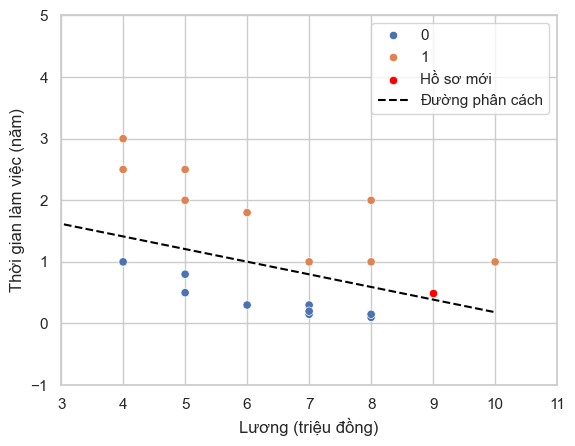

In [28]:
# Giả sử ngân hàng yêu cầu hồ sơ đạt 80% mới cho vay, vẽ đồ thị phân cách giữa hồ sơ cho vay và không cho vay
sns.set(style="whitegrid")
plt.figure()
sns.scatterplot(x=df['Luong'], y=df['Thoi gian lam viec'], hue=df['Cho vay'], color='blue')
sns.scatterplot(x=X_new[:, 1], y=X_new[:, 2], color='red', label='Hồ sơ mới')
plt.xlabel('Lương (triệu đồng)')
plt.ylabel('Thời gian làm việc (năm)')
plt.xlim(3, 11)
plt.ylim(-1, 5)

# Vẽ đường phân cách
Z = weights[0] + weights[1]*X1 + weights[2]*X2
contour_set = plt.contour(X1, X2, Z, levels=[0.8], colors='black', linestyles='--')
proxy_line = Line2D([0], [0], color='black', linestyle='--', label='Đường phân cách')
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles=handles + [proxy_line])
plt.show()